<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/CNN/TOP%20Projects/Classifying%20Emotions/Classifying_emotion_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os 
import zipfile 

In [2]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2021-05-13 18:04:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2021-05-13 18:04:28 (127 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [4]:
zip_ref=zipfile.ZipFile('/tmp/happy-or-sad.zip','r')
zip_ref.extractall('/tmp/h-or-s')
zip_ref.close()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory('/tmp/h-or-s',
                                                  target_size=(150,150),
                                                  batch_size=64,
                                                  class_mode='binary')

Found 80 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers

model=tf.keras.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit_generator(train_generator
                            ,epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 5s 3s/step - loss: 0.6514 - accuracy: 0.5500
Epoch 2/20
2/2 [==============================] - 3s 647ms/step - loss: 6.8914 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 0.7049 - accuracy: 0.4625
Epoch 4/20
2/2 [==============================] - 3s 644ms/step - loss: 0.6286 - accuracy: 0.5552
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.6231 - accuracy: 0.7833
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.9404 - accuracy: 0.6792
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.5833 - accuracy: 0.7167
Epoch 8/20
2/2 [==============================] - 3s 632ms/step - loss: 0.3975 - accuracy: 0.7802
Epoch 9/20
2/2 [==============================] - 3s 657ms/step - loss: 0.5791 - accuracy: 0.6885
Epoch 10/20
2/2 [==============================] - 3s 652ms/step - loss: 0.3219 - accuracy: 0.8021
Epoch 11/20
2/2 [=================

In [18]:
acc=history.history['accuracy']
#val_acc=history.history['val_accuracy']

loss=history.history['loss']
#val_loss=history.history['val_loss']

length=range(20) # Epochs

In [17]:
acc

[0.574999988079071,
 0.5,
 0.4749999940395355,
 0.574999988079071,
 0.862500011920929,
 0.550000011920929,
 0.824999988079071,
 0.7875000238418579,
 0.7124999761581421,
 0.8125,
 0.9375,
 0.9125000238418579,
 0.8125,
 0.925000011920929,
 0.9375,
 0.9750000238418579,
 0.887499988079071,
 1.0,
 0.887499988079071,
 0.8500000238418579]

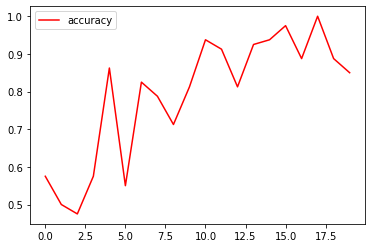

In [20]:
import matplotlib.pyplot as plt

plt.plot(length,acc,color='red',label='accuracy')
#plt.plot(length,val_acc,color='blue',label='val_accuracy')
plt.legend()

plt.show()

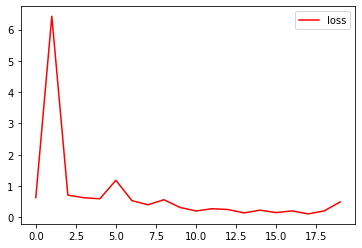

In [21]:
import matplotlib.pyplot as plt

plt.plot(length,loss,color='red',label='loss')
#plt.plot(length,val_loss,color='blue',label='val_loss')
plt.legend()

plt.show()